In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dfcopy.shape

(303, 14)

In [6]:
#check null values
dfcopy.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#check duplicate values
dfcopy.duplicated().sum()

1

In [9]:
dfcopy=dfcopy.drop_duplicates()

In [11]:
dfcopy.shape

(302, 14)

In [14]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
dfcopy.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=dfcopy[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=dfcopy['target']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
X_train.shape

(241, 13)

In [20]:
y_train.shape

(241,)

In [21]:
X_test.shape

(61, 13)

In [22]:
y_test.shape

(61,)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier()

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=rf.predict(X_test)

In [28]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [30]:
print("accuracy:",accuracy_score(y_pred,y_test))

accuracy: 0.8852459016393442


In [32]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[26,  4],
       [ 3, 28]], dtype=int64)

In [34]:
import matplotlib.pyplot as plt

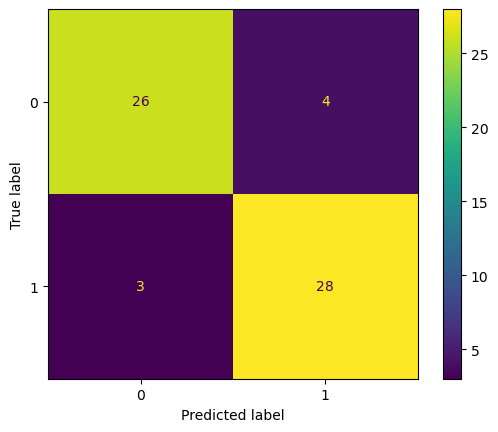

In [35]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()

In [36]:
rf=RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

# Cross Val Score

In [37]:
from sklearn.model_selection import cross_val_score
scores=(cross_val_score(rf,X_train,y_train,cv=10,scoring='accuracy'))
print(scores)

[0.76       0.875      0.79166667 0.91666667 0.83333333 0.79166667
 0.83333333 0.75       0.875      0.70833333]


In [38]:
print(scores.mean())

0.8135


# Hyperparameter tuning

# GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]

In [41]:
parameters={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }

In [42]:
rf_grid=GridSearchCV(estimator=rf,
                    param_grid=parameters,
                    cv=5, 
                    verbose=2, 
                    n_jobs=-1)

In [43]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=0.75,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [44]:
rf_grid.best_score_

0.8465136054421769

In [46]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 120}

# RandomSearchCV

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]
bootstrap=[True,False]
min_samples_split=[2, 5]
min_samples_leaf=[1, 2]

In [51]:
parameters={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }

In [52]:
rf_random=RandomizedSearchCV(estimator=rf, 
                       param_distributions=parameters, 
                       cv=5, 
                       verbose=2, 
                       n_jobs=-1)

In [53]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aqsa Kanwal\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 402, in f

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_samples=0.75,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [54]:
rf_random.best_score_

0.834013605442177

In [55]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 0.5,
 'max_features': 0.6,
 'max_depth': 8,
 'bootstrap': True}